<h2><strong>🏠House Sales in King County, USA💰</strong></h2>
<h4>Dataset Information 📃</h4>
- This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


<h3>0. Objective 🎯</h3>
<ul>
  <li>Explore and preprocess the dataset</li>
  <li>Build Linear,Multiple,Lasso, Ridge and Polynomial regression models</li>
</ul> 

<h3>1. Importing Libraries 📚</h3>

In [119]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

<h3>2. Reading Dataset 👀</h3>

In [120]:
#loading data
raw_data = pd.read_csv('kc_house_data.csv')
print(raw_data.columns)
raw_data.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h3>3. Checking Missing Values 🚫</h3>

In [121]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [122]:
raw_data.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h3>4. Data Exploration 📊</h3>

In [123]:
raw_data.describe(percentiles=[]).T

,count,mean,std,min,50%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,3.904930e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,4.500000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,2.250000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.910000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,7.618000e+03,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.500000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,5.000000e+00


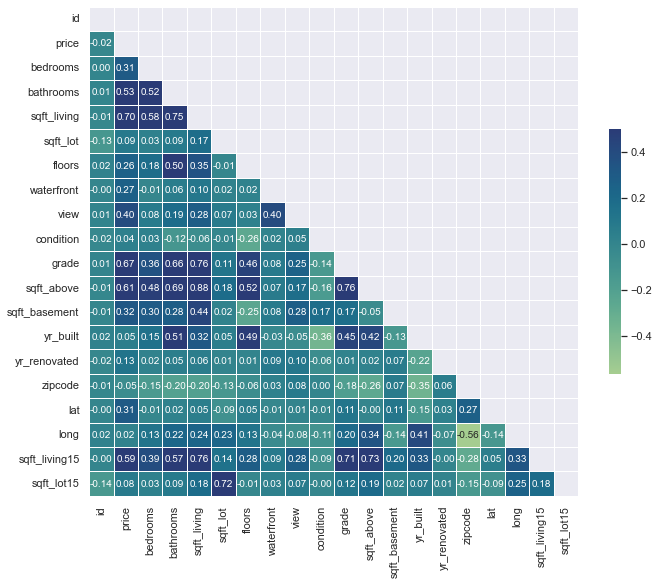

In [124]:
#diagonal correlation matrix
corr = raw_data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="crest", vmax=0.5, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot_kws={"fontsize": 10})

plt.show()

<h3>4. Data Preprocessing 🛠</h3>

In [125]:
#dropping id column
drop_cols = ['id']
data = raw_data.drop(drop_cols, axis=1)

In [126]:
#converting date column to datetime
data['date'] = pd.to_datetime(data['date'])
#extracting year, month and day from date column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop("date",axis=1)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


<h3>5. Simple Linear Regression</h3>

In [127]:
# Separating the independent and dependent variables
X = data['sqft_living']     # Independent (predictor variable)
y = data['price']           # Dependent (target variable)


In [128]:
# Dividing the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [129]:
# Reshaping the data
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Training the model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

In [130]:
arr = []

def metrics_df(model_name,details,y_test, y_pred, model,X_train, y_train): 
        # Importing libraries for metrics
        from sklearn.model_selection import cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score

        # Calculating metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
        r2 = r2_score(y_test, y_pred) # R^2 Score
        scores = cross_val_score(model, X_train, y_train, cv=5) # Cross-validation Score (cv=5)

    
        arr.append([model_name,details,rmse,r2,scores.mean()]) # Appending to the list

metrics_df('Simple Linear Regression', '-', y_test, y_pred, lr, X_train, y_train)

In [131]:
df = pd.DataFrame(arr, columns=['Model','Details','RMSE','R2','5-Fold Cross Validation'])
df

,Model,Details,RMSE,R2,5-Fold Cross Validation
0,Simple Linear Regression,-,248879.061242,0.479158,0.489993


<h3>6.1 Multiple Regression</h3>

In [132]:
X = data.drop('price', axis=1)     # Independent (predictor variable)
y = data['price']                  # Dependent (target variable)

In [133]:
# Dividing the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=25)

# Training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
y_pred = lr.predict(X_test) # Making predictions
# Metrics function
metrics_df('Multiple Regression', 'all features', y_test, y_pred, lr, X_train, y_train) 

In [135]:
# Append the results to the dataframe
new_line = {"Model": arr[-1][0], "Details": arr[-1][1], "RMSE": arr[-1][2], "R2": arr[-1][3], "5-Fold Cross Validation": arr[-1][4]}
df = pd.concat([df, pd.DataFrame(new_line, index=[0])], ignore_index=True)
df

,Model,Details,RMSE,R2,5-Fold Cross Validation
0,Simple Linear Regression,-,248879.061242,0.479158,0.489993
1,Multiple Regression,all features,210856.444257,0.688903,0.701826


<h3>6.2 Linear Regression w/Normalization</h3>

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('regression', LinearRegression())  # Step 2: Apply linear regression
])

pipeline.fit(X_train, y_train) # Fit the pipeline to the training set

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [137]:
y_pred = pipeline.predict(X_test) # Make predictions using the pipeline
# Metrics function
metrics_df('Multiple Regression', 'all features + scaling', y_test, y_pred, pipeline, X_train, y_train)

In [138]:
# Append the results to the dataframe
new_line = {"Model": arr[-1][0], "Details": arr[-1][1], "RMSE": arr[-1][2], "R2": arr[-1][3], "5-Fold Cross Validation": arr[-1][4]}
df = pd.concat([df, pd.DataFrame(new_line, index=[0])], ignore_index=True)
df


,Model,Details,RMSE,R2,5-Fold Cross Validation
0,Simple Linear Regression,-,248879.061242,0.479158,0.489993
1,Multiple Regression,all features,210856.444257,0.688903,0.701826
2,Multiple Regression,all features + scaling,210866.058887,0.688875,0.701763


<h3>6.3 Ridge Regression</h3>

In [139]:
from sklearn.linear_model import Ridge

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('ridge', Ridge(alpha=1))  # Step 2: Apply ridge regression with alpha=1
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test) # Make predictions using the pipeline


In [140]:
y_pred = pipeline.predict(X_test) # Make predictions using the pipeline
# Metrics function
metrics_df('Ridge Regression', 'alpha=1', y_test, y_pred, pipeline, X_train, y_train)

In [141]:
# Append the results to the dataframe
new_line = {"Model": arr[-1][0], "Details": arr[-1][1], "RMSE": arr[-1][2], "R2": arr[-1][3], "5-Fold Cross Validation": arr[-1][4]}
df = pd.concat([df, pd.DataFrame(new_line, index=[0])], ignore_index=True)
df

,Model,Details,RMSE,R2,5-Fold Cross Validation
0,Simple Linear Regression,-,248879.061242,0.479158,0.489993
1,Multiple Regression,all features,210856.444257,0.688903,0.701826
2,Multiple Regression,all features + scaling,210866.058887,0.688875,0.701763
3,Ridge Regression,alpha=1,210856.860130,0.688902,0.701827


<h3>6.4 Lasso Regression</h3>

In [142]:
from sklearn.linear_model import Lasso

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('lasso', Lasso(alpha=1.0, max_iter=5000))  # Step 2: Apply Lasso regression with adjusted parameters
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(max_iter=5000))])

In [143]:
y_pred = pipeline.predict(X_test) # Making predictions using the pipeline
# Metrics function
metrics_df('Lasso Regression', 'alpha=1.0, max_iter=5000', y_test, y_pred, pipeline, X_train, y_train)

In [144]:
# Append the results to the dataframe
new_line = {"Model": arr[-1][0], "Details": arr[-1][1], "RMSE": arr[-1][2], "R2": arr[-1][3], "5-Fold Cross Validation": arr[-1][4]}
df = pd.concat([df, pd.DataFrame(new_line, index=[0])], ignore_index=True)
df

,Model,Details,RMSE,R2,5-Fold Cross Validation
0,Simple Linear Regression,-,248879.061242,0.479158,0.489993
1,Multiple Regression,all features,210856.444257,0.688903,0.701826
2,Multiple Regression,all features + scaling,210866.058887,0.688875,0.701763
3,Ridge Regression,alpha=1,210856.860130,0.688902,0.701827
4,Lasso Regression,"alpha=1.0, max_iter=5000",210856.379182,0.688903,0.701826


<h3>7. Polynomial Regression</h3>

In [145]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_poly, y_train) # Fit the polynomial features to the linear regression model

LinearRegression()

In [146]:
# Making predictions
y_pred = lr.predict(poly_reg.fit_transform(X_test))
# Metrics function
metrics_df('Polynomial regression', 'degree=2', y_test, y_pred, lr, X_poly, y_train)

In [147]:
# Append the results to the dataframe
new_line = {"Model": arr[-1][0], "Details": arr[-1][1], "RMSE": arr[-1][2], "R2": arr[-1][3], "5-Fold Cross Validation": arr[-1][4]}
df = pd.concat([df, pd.DataFrame(new_line, index=[0])], ignore_index=True)

<h3>8. Evaluation Table</h3>

In [148]:
df.sort_values(by='R2', ascending=False)

,Model,Details,RMSE,R2,5-Fold Cross Validation
5,Polynomial regression,degree=2,170798.155110,0.795879,0.822721
4,Lasso Regression,"alpha=1.0, max_iter=5000",210856.379182,0.688903,0.701826
1,Multiple Regression,all features,210856.444257,0.688903,0.701826
3,Ridge Regression,alpha=1,210856.860130,0.688902,0.701827
2,Multiple Regression,all features + scaling,210866.058887,0.688875,0.701763
0,Simple Linear Regression,-,248879.061242,0.479158,0.489993


<h3>Conclusion</h3><br>Looking into the evaluation table, 2nd degree polynomial(all features) is the best model.